# Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as pl

In [65]:
data = pd.read_excel('Copy of loan.xlsx')

In [66]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [67]:
# converting dependent column into integer or float

In [68]:
data['Dependents'] = data['Dependents'].replace('3+', 3)

In [69]:
data['Dependents'].unique()

array([ 0.,  1.,  2.,  3., nan])

In [70]:
data['Dependents']= pd.to_numeric(data['Dependents'], errors = 'coerce')

In [71]:
data.shape

(614, 13)

In [72]:
# removing null values

In [73]:
data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [74]:
# checking the distribution of few columns to understand what method should we take to perform imputation

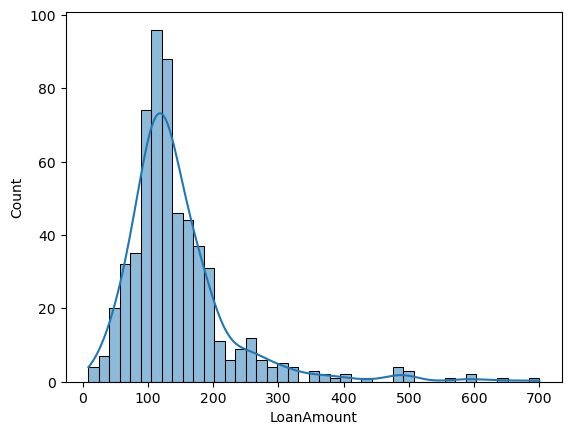

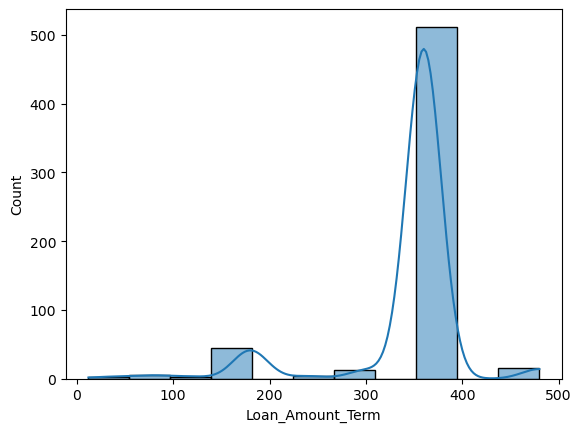

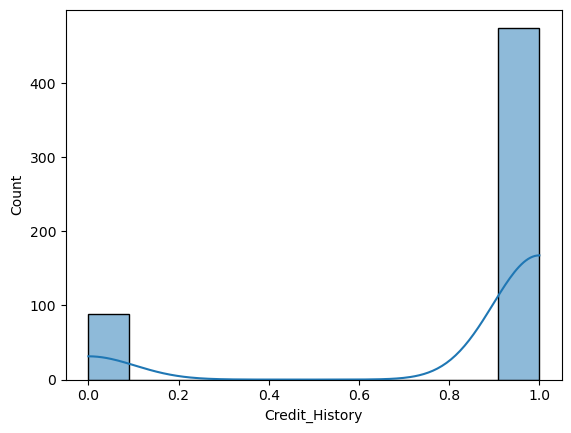

In [75]:
cols = ['LoanAmount','Loan_Amount_Term','Credit_History']

for i in cols:
    sns.histplot(data[i], kde = True)
    plt.show()

In [76]:
# median is a better choice then mean for loan amount and loan amount term  and for credit_history we can impute with mode 

In [77]:
data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].median())

In [78]:
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].median())

In [79]:
data['Credit_History'] = data['Credit_History'].fillna(data['Credit_History'].mode()[0])

In [80]:
# now we have only 63 null values in the datasets so we can remove those null values 

In [81]:
data.dropna(inplace = True)

In [82]:
data.shape

(554, 13)

In [83]:
# Before doing outliers analysis we can combine two columns into one column that are applicant income and co-applicant income

In [84]:
data['total_income'] = data['ApplicantIncome'] + data['CoapplicantIncome']

In [85]:
# now we can remove two columns applicant income and co applicant income 

In [86]:
data.drop(columns = (['ApplicantIncome','CoapplicantIncome']), axis = 1 , inplace  = True)

In [87]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,total_income
0,LP001002,Male,No,0.0,Graduate,No,128.0,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1.0,Graduate,No,128.0,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0.0,Graduate,Yes,66.0,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0.0,Not Graduate,No,120.0,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0.0,Graduate,No,141.0,360.0,1.0,Urban,Y,6000.0


In [88]:
# Now let go for outlier analysis

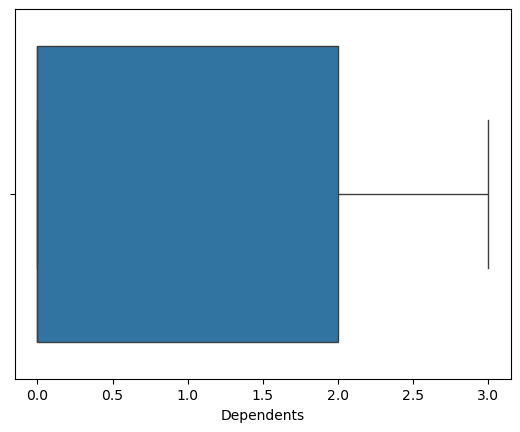

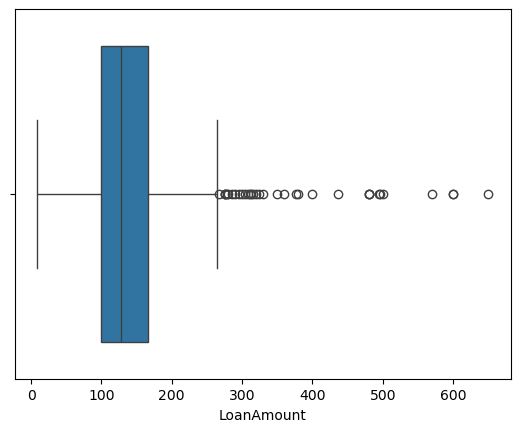

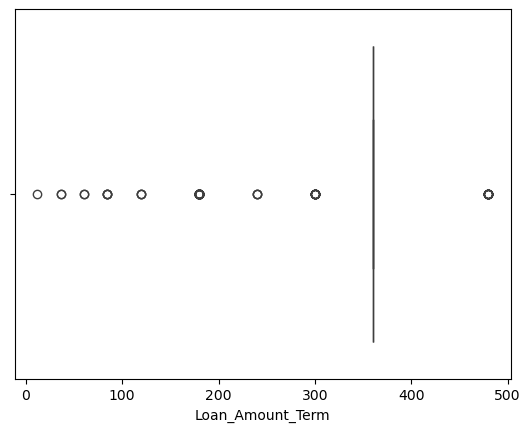

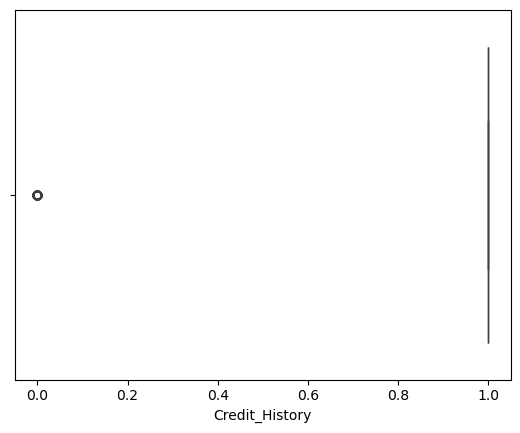

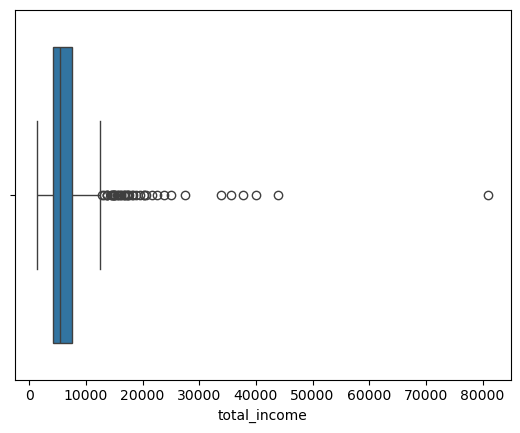

In [89]:
for i in data.columns:
    if data[i].dtype != 'object':
        sns.boxplot(x = data[i])
        plt.show()

In [90]:
out_cols = ['LoanAmount','total_income']

In [91]:
# we have remove outliers from these columns to improve the performance of the model

In [92]:
for i in out_cols:
    q3 = data[i].quantile(.75)
    q1 = data[i].quantile(.25)
    iqr = q3-q1
    uf = q3+(1.5*iqr)
    lf = q1-(1.5*iqr)
    data[i] = data[i][(data[i] > lf) & (data[i]< uf)]

In [93]:
# now lets checl the outliers again 

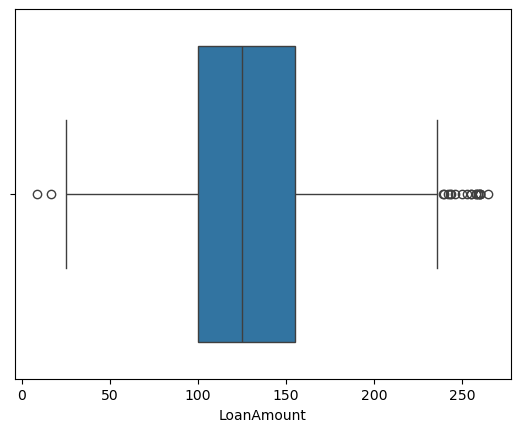

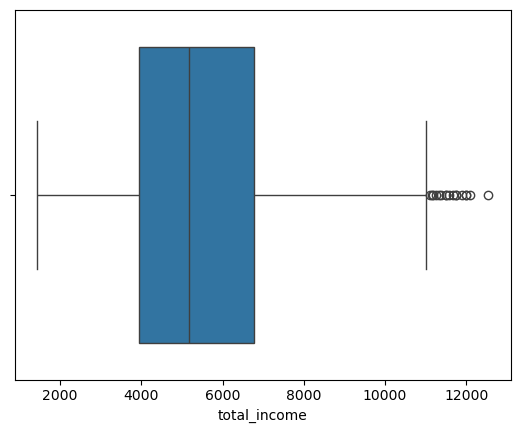

In [94]:
for i in out_cols:
    sns.boxplot(x = data[i])
    plt.show()

In [95]:
# Finally we have removed most of the outlier that can cause baisness in our model

In [96]:
# we have to drop null values again from the datasets 

In [97]:
data.dropna(inplace = True)

In [98]:
data.isna().sum()

Loan_ID             0
Gender              0
Married             0
Dependents          0
Education           0
Self_Employed       0
LoanAmount          0
Loan_Amount_Term    0
Credit_History      0
Property_Area       0
Loan_Status         0
total_income        0
dtype: int64

In [99]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,total_income
0,LP001002,Male,No,0.0,Graduate,No,128.0,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1.0,Graduate,No,128.0,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0.0,Graduate,Yes,66.0,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0.0,Not Graduate,No,120.0,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0.0,Graduate,No,141.0,360.0,1.0,Urban,Y,6000.0


# Our data is clean now 

In [100]:
# lets perform labelencoding 

In [101]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [102]:
for i in data.columns:
    if data[i].dtype == 'object':
        data[i] = le.fit_transform(data[i])
        print(i,le.classes_)
        mapping = dict(zip(le.classes_, le.transform(le.classes_)))
        print()
        print(mapping)

Loan_ID ['LP001002' 'LP001003' 'LP001005' 'LP001006' 'LP001008' 'LP001013'
 'LP001014' 'LP001018' 'LP001024' 'LP001028' 'LP001029' 'LP001030'
 'LP001032' 'LP001034' 'LP001036' 'LP001038' 'LP001043' 'LP001047'
 'LP001066' 'LP001068' 'LP001073' 'LP001086' 'LP001095' 'LP001097'
 'LP001098' 'LP001106' 'LP001109' 'LP001112' 'LP001114' 'LP001116'
 'LP001119' 'LP001120' 'LP001123' 'LP001131' 'LP001136' 'LP001137'
 'LP001138' 'LP001144' 'LP001146' 'LP001151' 'LP001155' 'LP001157'
 'LP001164' 'LP001179' 'LP001194' 'LP001195' 'LP001197' 'LP001198'
 'LP001199' 'LP001205' 'LP001206' 'LP001207' 'LP001213' 'LP001222'
 'LP001225' 'LP001228' 'LP001238' 'LP001241' 'LP001243' 'LP001245'
 'LP001248' 'LP001250' 'LP001253' 'LP001255' 'LP001256' 'LP001259'
 'LP001263' 'LP001264' 'LP001265' 'LP001266' 'LP001267' 'LP001273'
 'LP001275' 'LP001279' 'LP001280' 'LP001282' 'LP001289' 'LP001310'
 'LP001316' 'LP001318' 'LP001319' 'LP001322' 'LP001325' 'LP001327'
 'LP001333' 'LP001334' 'LP001343' 'LP001345' 'LP001349

In [103]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,total_income
0,0,1,0,0.0,0,0,128.0,360.0,1.0,2,1,5849.0
1,1,1,1,1.0,0,0,128.0,360.0,1.0,0,0,6091.0
2,2,1,1,0.0,0,1,66.0,360.0,1.0,2,1,3000.0
3,3,1,1,0.0,1,0,120.0,360.0,1.0,2,1,4941.0
4,4,1,0,0.0,0,0,141.0,360.0,1.0,2,1,6000.0


In [90]:
# lets check important columns for the model

<Axes: >

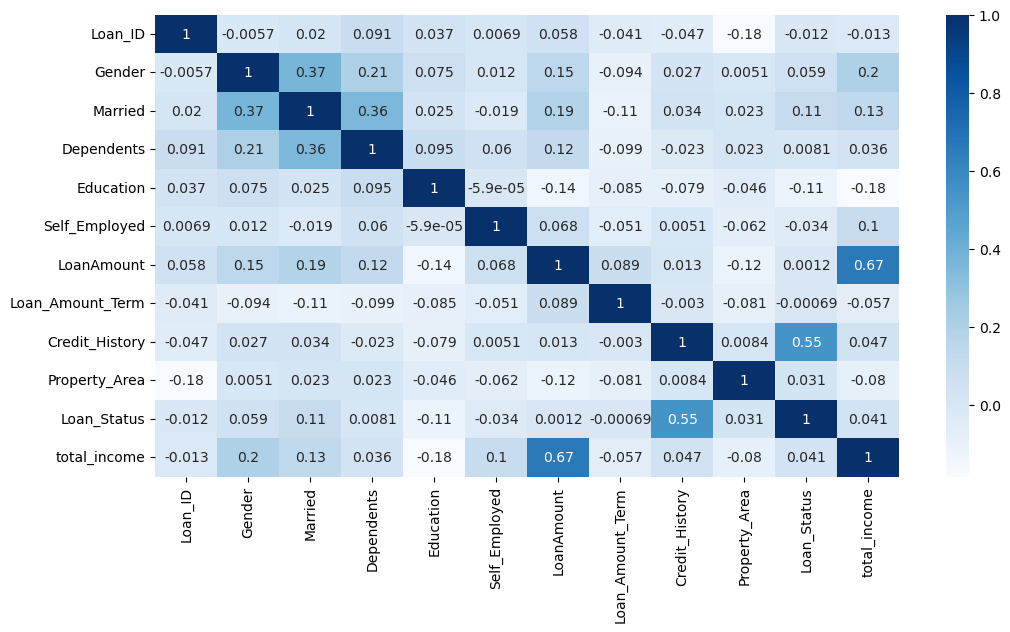

In [95]:
plt.figure(figsize = (12,6))
sns.heatmap(data.corr(),annot= True  , cmap = 'Blues')

In [96]:
# lets do VIf

In [97]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [100]:
cols = []

In [101]:
for i in data.columns:
    if i != 'Loan_Status':
        cols.append(i)

In [103]:
x = data[cols]

In [105]:
vif_new  = pd.DataFrame()

In [106]:
vif_new['features'] = x.columns
vif_new['vif'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]

In [107]:
vif_new

,features,vif
0,Loan_ID,3.797135
1,Gender,6.364928
2,Married,3.693235
3,Dependents,1.838014
4,Education,1.356188
5,Self_Employed,1.153962
6,LoanAmount,16.634602
7,Loan_Amount_Term,13.000766
8,Credit_History,6.338170
9,Property_Area,2.607676


In [108]:
# LETs do Rfe

In [111]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [113]:
rfe = RFE(LogisticRegression())

In [118]:
# splitting the data

x = data.drop(columns = ['Loan_Status'], axis =1)
y = data['Loan_Status']

In [121]:
rfe.fit(x,y)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

RFE(estimator=LogisticRegression())

In [123]:
rfe.ranking_

array([6, 1, 1, 3, 1, 1, 4, 5, 1, 2, 7])

In [126]:
x.columns[rfe.get_support()]

Index(['Gender', 'Married', 'Education', 'Self_Employed', 'Credit_History'], dtype='object')

In [130]:
# lets select the important columns

model_cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Credit_History']

In [131]:
model_cols

['Gender', 'Married', 'Education', 'Self_Employed', 'Credit_History']

In [132]:
x = data[model_cols]

In [136]:
# builing the model

In [137]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [138]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .2 , random_state = 30)

In [180]:
model = LogisticRegression()

In [141]:
model.fit(x_train,y_train)

LogisticRegression()

In [143]:
pred = model.predict(x_test)

In [145]:
from sklearn.metrics import *

In [148]:
accuracy_score(y_test,pred)

0.86

# accuracy_score without standardize the data is 86%

In [152]:
# lets standardize the data 

In [181]:
from sklearn.preprocessing import StandardScaler

In [182]:
scaler = StandardScaler()

In [183]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [184]:
# lets train the model with scaled data 

In [185]:
model.fit(x_train_scaled,y_train)

LogisticRegression()

In [186]:
pred = model.predict(x_test_scaled)

In [187]:
accuracy_score(y_test,pred)

0.86

# we got same accuracy in scaled data that is 86%

In [161]:
# lets build an another model name decision Tree

In [162]:
from sklearn.tree import DecisionTreeClassifier

In [163]:
model = DecisionTreeClassifier()

In [165]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .2 , random_state = 30)

In [173]:
model.fit(x_train_scaled,y_train)

DecisionTreeClassifier()

In [174]:
pred = model.predict(x_test_scaled)

In [175]:
accuracy_score(y_test, pred)

0.86

# we got accuracy 86%

In [188]:
# lets built another model random_forest

In [207]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .2 , random_state = 30)

In [208]:
from sklearn.ensemble import RandomForestClassifier

In [209]:
model = RandomForestClassifier(n_estimators=100)

In [210]:
model.fit(x_train, y_train)

RandomForestClassifier()

In [211]:
pred = model.predict(x_test)

In [212]:
accuracy_score(y_test,pred)

0.86

# again we got accuracy 86%

In [41]:
# lets do check with whole data once 

In [42]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,total_income
0,0,1,0,0.0,0,0,128.0,360.0,1.0,2,1,5849.0
1,1,1,1,1.0,0,0,128.0,360.0,1.0,0,0,6091.0
2,2,1,1,0.0,0,1,66.0,360.0,1.0,2,1,3000.0
3,3,1,1,0.0,1,0,120.0,360.0,1.0,2,1,4941.0
4,4,1,0,0.0,0,0,141.0,360.0,1.0,2,1,6000.0


In [43]:
x = data.drop(['Loan_Status'], axis = 1 )

In [45]:
y = data['Loan_Status']

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .2 , random_state = 30)

In [48]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [49]:
model.fit(x_train,y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [50]:
from sklearn.metrics import *

In [52]:
pred = model.predict(x_test)

In [53]:
accuracy_score(y_test,pred)

0.86

In [54]:
# -----------------------------------------------------------------------------------

In [56]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(x)

In [57]:
x_train,x_test,y_train,y_test = train_test_split(scaled_data, y , test_size = .2 , random_state = 30)

In [58]:
model = LogisticRegression()

In [59]:
model.fit(x_train ,y_train)

LogisticRegression()

In [60]:
pred = model.predict(x_test)

In [61]:
accuracy_score(y_test,pred)

0.86

In [62]:
# lets build another model 

In [104]:
y = data['Loan_Status']
x = data.drop(['Loan_Status'], axis = 1 )


In [105]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .2 , random_state = 30)

In [106]:
from sklearn.naive_bayes import GaussianNB

In [107]:
model = GaussianNB()

In [109]:
model.fit(x_train,y_train)

GaussianNB()

In [110]:
pred = model.predict(x_test)

In [112]:
accuracy_score(y_test,pred)

0.8